# **EVOLUTION D'UN ECOSYSTEME**

##**Samar KRIMI - M2 BDIA**


> ## **État Initial** :

Une population d'animaux avec une énergie, une forme physique (fitness), une quantité de nourriture et un nombre de prédateurs.
Si la population ou l'énergie tombe à 0, le jeu s'arrête (extinction).

**Actions Possibles** :

- Migrer : Augmente la fitness (+5) mais diminue l'énergie (-10).
- Se reproduire : Augmente la population (+2) mais consomme de l'énergie (-15).
- Chercher de la nourriture : Augmente l'énergie (+20) mais réduit la nourriture disponible (-10).
- Éviter les prédateurs : Diminue le nombre de prédateurs (-1) mais coûte de l'énergie (-5).

**Facteurs Environnementaux** :

La nourriture diminue naturellement avec le temps.
Le nombre de prédateurs fluctue aléatoirement.

**Stratégie et Algorithme** :

L'algorithme MCTS (Monte Carlo Tree Search) choisit les meilleures actions pour maximiser la survie et l'évolution de l'écosystème.
Il simule plusieurs scénarios avant de prendre une décision optimale.

**Objectif** :

Maximiser la population, la fitness et l'énergie tout en évitant l'extinction.
Surveiller l'évolution des paramètres sur plusieurs tours pour ajuster les choix.

## **Algorithmes :**
### 1. MCTS : Monte Carlo Tree Search
### 2. GNRPA + Croissance Logistique + Feedbacks Adaptatifs
### 3. Parallel MCTS + Algorithme génétique
### 4. PUCT + Croissance Logistique + Feedbacks Adaptatifs

> ###  Ceci est une simulation pour chaque Algorithme sur une instance d'un jeu. Vous pouvez observer l'évolution des variables **(énergie, fitness, population)** au fil des étapes.

#  🔍 **AVEC 1 SIMULATION**

## **ALGORITHME 1 : MCTS**

### **Objectif**
Cet algorithme applique Monte Carlo Tree Search (MCTS) pour optimiser la prise de décision dans un écosystème simulé où une espèce doit maximiser sa survie et son adaptation.
L'algorithme optimise la survie et l'adaptation de l'espèce dans l'environnement en prenant les meilleures décisions à long terme.

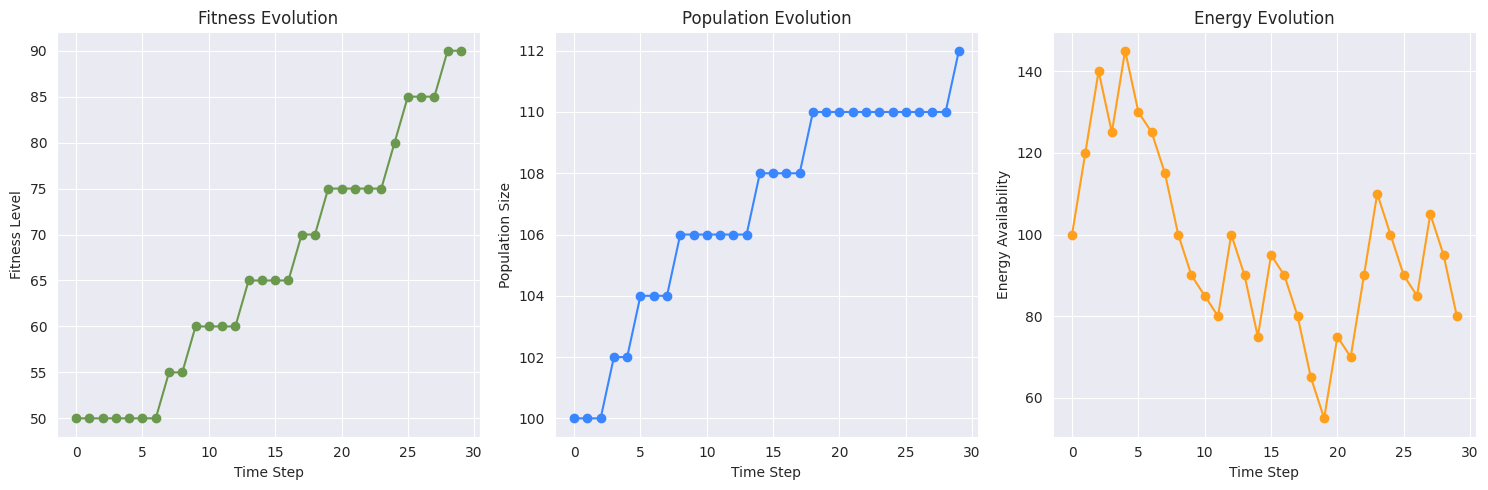

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

class EcosystemState:
    def __init__(self, fitness, population, energy, food, predators):
        self.fitness = fitness
        self.population = population
        self.energy = energy
        self.food = food
        self.predators = predators

    def get_possible_actions(self):
        return ["migrate", "reproduce", "forage", "avoid_predators"]

    def perform_action(self, action):
        new_state = EcosystemState(self.fitness, self.population, self.energy, self.food, self.predators)
        if action == "migrate":
            new_state.energy -= 10
            new_state.fitness += 5
        elif action == "reproduce":
            new_state.population += 2
            new_state.energy -= 15
        elif action == "forage":
            new_state.energy += 20
            new_state.food -= 10
        elif action == "avoid_predators":
            new_state.predators -= 1
            new_state.energy -= 5

        # Environmental effects (random changes)
        new_state.food = max(0, new_state.food - random.randint(2, 5))  # Food decreases naturally
        new_state.predators = max(0, new_state.predators + random.randint(-1, 2))  # Predators fluctuate

        return new_state

    def is_terminal(self):
        return self.population <= 0 or self.energy <= 0  # Extinction condition

    def get_reward(self):
        return self.population + self.fitness - self.predators

class MCTSNode:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = {}
        self.visits = 0
        self.value = 0

    def select_child(self):
        C = 1.41
        return max(self.children.items(), key=lambda child:
                   child[1].value / (child[1].visits + 1e-6) +
                   C * math.sqrt(math.log(self.visits + 1) / (child[1].visits + 1e-6)))[1]

    def expand(self):
        possible_actions = self.state.get_possible_actions()
        for action in possible_actions:
            if action not in self.children:
                new_state = self.state.perform_action(action)
                self.children[action] = MCTSNode(new_state, parent=self)

    def simulate(self):
        current_state = self.state
        while not current_state.is_terminal():
            action = random.choice(current_state.get_possible_actions())
            current_state = current_state.perform_action(action)
        return current_state.get_reward()

    def backpropagate(self, reward):
        self.visits += 1
        self.value += reward
        if self.parent:
            self.parent.backpropagate(reward)

def mcts(root_state, iterations=500):
    root_node = MCTSNode(root_state)
    for _ in range(iterations):
        node = root_node
        while node.children and not node.state.is_terminal():
            node = node.select_child()
        if not node.state.is_terminal():
            node.expand()
            node = random.choice(list(node.children.values()))
        reward = node.simulate()
        node.backpropagate(reward)
    best_action = max(root_node.children.items(), key=lambda child: child[1].visits)[0]
    return best_action

# Initialize ecosystem
initial_state = EcosystemState(fitness=50, population=100, energy=80, food=50, predators=5)

# Track state evolution
time_steps = 30  # Number of steps to simulate
fitness_over_time = []
population_over_time = []
energy_over_time = []

current_state = initial_state
for t in range(time_steps):
    if current_state.is_terminal():
        break
    best_action = mcts(current_state, iterations=500)
    current_state = current_state.perform_action(best_action)

    fitness_over_time.append(current_state.fitness)
    population_over_time.append(current_state.population)
    energy_over_time.append(current_state.energy)

# Plot state evolution
sns.set_style("darkgrid")

plt.figure(figsize=(15, 5))

# Fitness Evolution
plt.subplot(1, 3, 1)
plt.plot(range(len(fitness_over_time)), fitness_over_time, color="#6a994e", marker='o', linestyle='-')

plt.xlabel("Time Step")
plt.ylabel("Fitness Level")
plt.title("Fitness Evolution")

# Population Evolution
plt.subplot(1, 3, 2)
plt.plot(range(len(population_over_time)), population_over_time, color="#3a86ff", marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Population Size")
plt.title("Population Evolution")

# Food Availability Evolution
plt.subplot(1, 3, 3)
plt.plot(range(len(energy_over_time)), energy_over_time, color="#ff9f1c", marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Energy Availability")
plt.title("Energy Evolution")

plt.tight_layout()
plt.show()

### **Conclusion**
L'algorithme démontre la puissance de MCTS pour la prise de décision dans un environnement incertain et dynamique. Grâce à ses simulations répétées, il parvient à identifier des stratégies efficaces qui maximisent la résilience de l'espèce face aux changements environnementaux.

Les résultats montrent :

- Une évolution progressive de la fitness, de la population et de l'énergie au fil du temps.
- Une réduction des risques liés à l'extinction en évitant les choix trop hasardeux.
- Une capacité d'adaptation accrue, car les décisions sont basées sur l'exploration de multiples scénarios plutôt que sur une approche déterministe.

## **ALGORITHME 2 : GNRPA + CROISSANCE LOGISTIQUE + FEEDBACKS ADAPTATIFS**

### **Objectif**
L'algorithme GNRPA (Guided Nested Rollout Policy Adaptation) avec croissance logistique et feedbacks adaptatifs est conçu pour optimiser la prise de décision dans un écosystème dynamique.
Il vise à maximiser la survie et l'adaptation d'une espèce en explorant les meilleures séquences d'actions possibles.

L'algorithme repose sur trois piliers :
- GNRPA → Apprend une politique adaptative par rollouts imbriqués.
- Croissance Logistique → Modélise l'impact des ressources et de la population.
- Feedbacks Adaptatifs → Ajuste la stratégie avec une fonction sigmoïde.

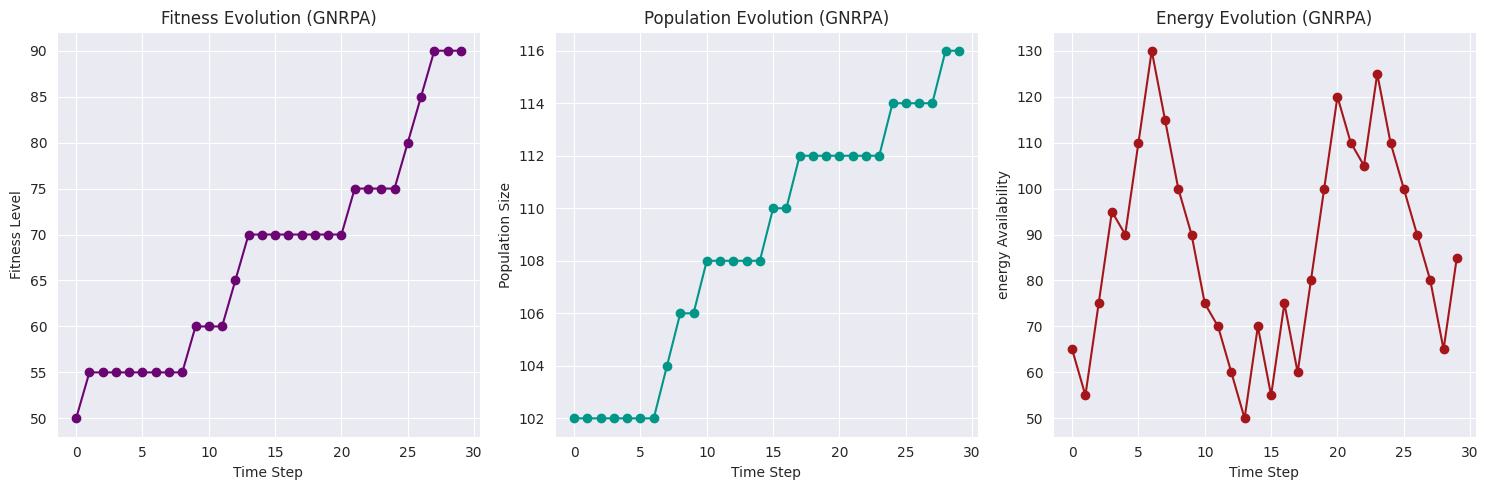

CPU times: user 1min 5s, sys: 2.59 s, total: 1min 8s
Wall time: 1min 11s


In [ ]:
%%time
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class EcosystemState:
    def __init__(self, fitness, population, energy, food, predators):
        self.fitness = fitness
        self.population = population
        self.energy = energy
        self.food = food
        self.predators = predators

    def get_possible_actions(self):
        return ["migrate", "reproduce", "forage", "avoid_predators"]

    def perform_action(self, action):
        new_state = EcosystemState(self.fitness, self.population, self.energy, self.food, self.predators)
        if action == "migrate":
            new_state.energy -= 10
            new_state.fitness += 5
        elif action == "reproduce":
            new_state.population += 2
            new_state.energy -= 15
        elif action == "forage":
            new_state.energy += 20
            new_state.food -= 10
        elif action == "avoid_predators":
            new_state.predators -= 1
            new_state.energy -= 5

        # Environmental effects
        new_state.food = max(0, new_state.food - random.randint(2, 5))
        new_state.predators = max(0, new_state.predators + random.randint(-1, 2))

        return new_state

    def is_terminal(self):
        return self.population <= 0 or self.energy <= 0

    def get_reward(self):
        return self.population + self.fitness - self.predators

def logistic_feedback(value, alpha=1.5):
    return 1 / (1 + math.exp(-alpha * value))  # Sigmoid function for feedback

def gnrpa(level, state, policy, alpha=1.5):
    if level == 0:
        return simulate(state)

    best_score = -float("inf")
    best_action_seq = []

    for _ in range(10):  # Perform rollouts
        actions = []
        current_state = state
        while not current_state.is_terminal():
            probabilities = [policy[a] for a in current_state.get_possible_actions()]
            action = np.random.choice(current_state.get_possible_actions(), p=probabilities)
            actions.append(action)
            current_state = current_state.perform_action(action)

        score = current_state.get_reward()
        if score > best_score:
            best_score = score
            best_action_seq = actions

    for action in best_action_seq:
        policy[action] += logistic_feedback(best_score, alpha)

    # Normalize policy
    total = sum(policy.values())
    for action in policy:
        policy[action] /= total

    return best_action_seq

def simulate(state):
    while not state.is_terminal():
        action = random.choice(state.get_possible_actions())
        state = state.perform_action(action)
    return state.get_reward()

# Initialize ecosystem state
initial_state = EcosystemState(fitness=50, population=100, energy=80, food=50, predators=5)

# Initialize policy (equal probability at start)
policy = {a: 1 / len(initial_state.get_possible_actions()) for a in initial_state.get_possible_actions()}

# Run GNRPA and track state evolution
time_steps = 30
fitness_over_time = []
population_over_time = []
energy_over_time = []

current_state = initial_state
for t in range(time_steps):
    if current_state.is_terminal():
        break

    best_action_seq = gnrpa(3, current_state, policy)
    if best_action_seq:
        current_state = current_state.perform_action(best_action_seq[0])  # Apply the first action of the best sequence

    fitness_over_time.append(current_state.fitness)
    population_over_time.append(current_state.population)
    energy_over_time.append(current_state.energy)

# Plot state evolution
sns.set_style("darkgrid")

plt.figure(figsize=(15, 5))

# Fitness Evolution
plt.subplot(1, 3, 1)
plt.plot(range(len(fitness_over_time)), fitness_over_time, color="#6a0572", marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Fitness Level")
plt.title("Fitness Evolution (GNRPA)")

# Population Evolution
plt.subplot(1, 3, 2)
plt.plot(range(len(population_over_time)), population_over_time, color="#009688", marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Population Size")
plt.title("Population Evolution (GNRPA)")

# Fitness Availability Evolution
plt.subplot(1, 3, 3)
plt.plot(range(len(energy_over_time)), energy_over_time, color="#a4161a", marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("energy Availability")
plt.title("Energy Evolution (GNRPA)")

plt.tight_layout()
plt.show()

### **Conclusion**
L'algorithme GNRPA + Croissance Logistique + Feedbacks Adaptatifs est une alternative efficace à MCTS pour modéliser l'évolution d'un écosystème.
Il permet :
- Une optimisation progressive via des rollouts imbriqués.
- Un apprentissage probabiliste sans construction d'arbre.
- Une meilleure adaptabilité aux changements environnementaux.

## **ALGORITHME 3 : PARALLEL MCTS + ALGORITHME GENETIQUE**

### **Objectif**
Cet algorithme combine Monte Carlo Tree Search (MCTS) parallèle et algorithmes génétiques (GA) pour optimiser la stratégie d'une espèce dans un écosystème dynamique.

Il vise à :
- Maximiser la survie de l'espèce en maintenant une population stable.
- Optimiser les décisions en explorant l'espace des actions avec MCTS.
- Évoluer les stratégies avec un algorithme génétique adaptatif.

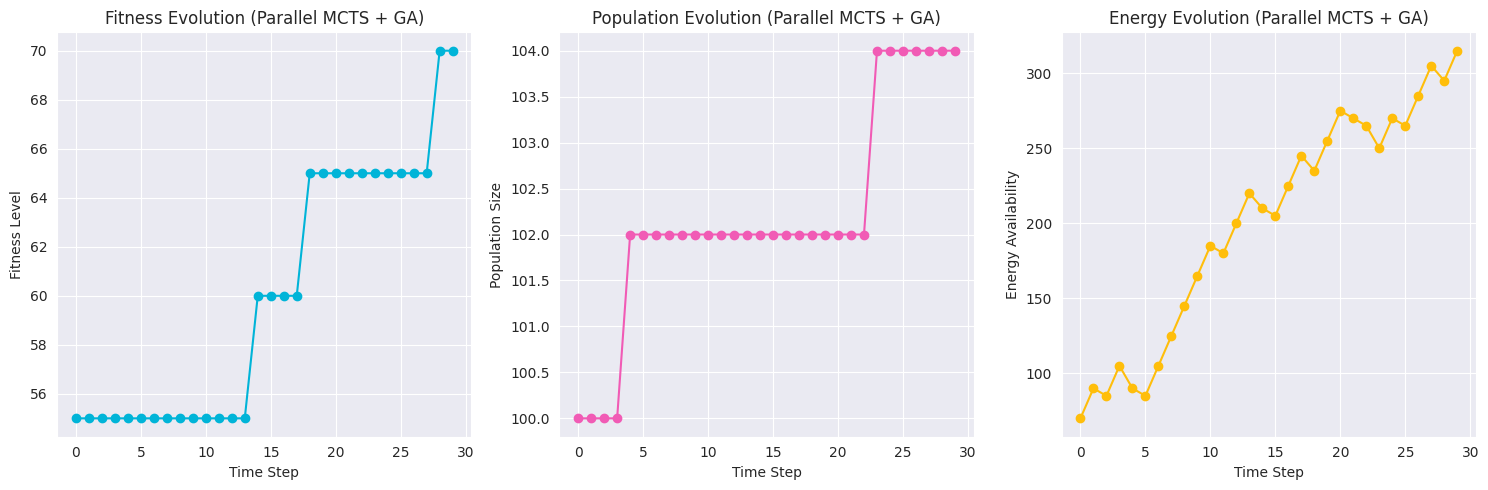

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor

# Ecosystem State Representation
class EcosystemState:
    def __init__(self, fitness, population, energy, food, predators):
        self.fitness = fitness
        self.population = population
        self.energy = energy
        self.food = food
        self.predators = predators

    def get_possible_actions(self):
        return ["migrate", "reproduce", "forage", "avoid_predators"]

    def perform_action(self, action):
        new_state = EcosystemState(self.fitness, self.population, self.energy, self.food, self.predators)
        if action == "migrate":
            new_state.energy -= 10
            new_state.fitness += 5
        elif action == "reproduce":
            new_state.population += 2
            new_state.energy -= 15
        elif action == "forage":
            new_state.energy += 20
            new_state.food -= 10
        elif action == "avoid_predators":
            new_state.predators -= 1
            new_state.energy -= 5

        # Environmental effects
        new_state.food = max(0, new_state.food - random.randint(2, 5))
        new_state.predators = max(0, new_state.predators + random.randint(-1, 2))

        return new_state

    def is_terminal(self):
        return self.population <= 0 or self.energy <= 0

    def get_reward(self):
        return self.population + self.fitness - self.predators

# MCTS with Rollout Simulation
def mcts(state, num_simulations=10):
    best_action = None
    best_score = -float("inf")

    for action in state.get_possible_actions():
        total_score = 0
        for _ in range(num_simulations):
            simulated_state = state.perform_action(action)
            while not simulated_state.is_terminal():
                next_action = random.choice(simulated_state.get_possible_actions())
                simulated_state = simulated_state.perform_action(next_action)
            total_score += simulated_state.get_reward()

        avg_score = total_score / num_simulations
        if avg_score > best_score:
            best_score = avg_score
            best_action = action

    return best_action

# Genetic Algorithm Operators
def mutate(action_seq):
    actions = ["migrate", "reproduce", "forage", "avoid_predators"]
    if random.random() < 0.3:  # Mutation rate
        idx = random.randint(0, len(action_seq) - 1)
        action_seq[idx] = random.choice(actions)
    return action_seq

def crossover(seq1, seq2):
    point = random.randint(1, len(seq1) - 1)
    return seq1[:point] + seq2[point:]

def genetic_algorithm(population, fitness_func, num_generations=5):
    for _ in range(num_generations):
        population.sort(key=fitness_func, reverse=True)  # Select best actions
        new_population = population[:len(population) // 2]  # Keep top 50%

        # Crossover
        for i in range(len(new_population) - 1):
            new_population.append(crossover(new_population[i], new_population[i + 1]))

        # Mutation
        population = [mutate(seq) for seq in new_population]

    return population[0]  # Return best strategy

# Parallel Execution of MCTS
def parallel_mcts(state, num_workers=4):
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        results = list(executor.map(mcts, [state] * num_workers))
    return max(set(results), key=results.count)  # Select most frequent action

# Running the Simulation
initial_state = EcosystemState(fitness=50, population=100, energy=80, food=50, predators=5)
time_steps = 30
fitness_over_time = []
population_over_time = []
energy_over_time = []

current_state = initial_state
action_population = [[random.choice(current_state.get_possible_actions()) for _ in range(5)] for _ in range(10)]  # Initial random strategies

for t in range(time_steps):
    if current_state.is_terminal():
        break

    best_strategy = genetic_algorithm(action_population, lambda seq: sum([current_state.perform_action(a).get_reward() for a in seq]))

    if best_strategy:
        best_action = parallel_mcts(current_state)
        current_state = current_state.perform_action(best_action)

    fitness_over_time.append(current_state.fitness)
    population_over_time.append(current_state.population)
    energy_over_time.append(current_state.energy)

# Plot State Evolution
sns.set_style("darkgrid")

plt.figure(figsize=(15, 5))

# Fitness Evolution
plt.subplot(1, 3, 1)
plt.plot(range(len(fitness_over_time)), fitness_over_time, color="#00b4d8", marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Fitness Level")
plt.title("Fitness Evolution (Parallel MCTS + GA)")

# Population Evolution
plt.subplot(1, 3, 2)
plt.plot(range(len(population_over_time)), population_over_time, color="#f15bb5", marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Population Size")
plt.title("Population Evolution (Parallel MCTS + GA)")

# Energy Availability Evolution
plt.subplot(1, 3, 3)
plt.plot(range(len(energy_over_time)), energy_over_time, color="#ffbe0b", marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Energy Availability")
plt.title("Energy Evolution (Parallel MCTS + GA)")

plt.tight_layout()
plt.show()

### **Conclusion :**
L'algorithme Parallel MCTS + GA combine exploration (MCTS) et apprentissage (GA) pour maximiser la survie d’une espèce.

- MCTS parallèle permet de prendre rapidement des décisions stratégiques.
- L'algorithme génétique assure une évolution adaptative sur plusieurs générations.
- La combinaison des deux permet une meilleure optimisation que MCTS seul.

## **ALGORITHME 4 : PUCT + CROISSANCE LOGISTIQUE + FEEDBACKS ADAPTATIFS**

### **Objectif**
Cet algorithme combine PUCT (Predictor Upper Confidence Tree), un modèle de croissance logistique et Feedbacks adaptatifs pour :
- Optimiser la survie et l'adaptation d'une espèce dans un écosystème dynamique.
- Utiliser PUCT pour équilibrer exploration et exploitation dans la prise de décision.
- Maximiser la fitness, la population et la disponibilité énergétique en sélectionnant des actions stratégiques.
- Réguler les récompenses par une fonction logistique pour une progression adaptative sans saturation rapide.

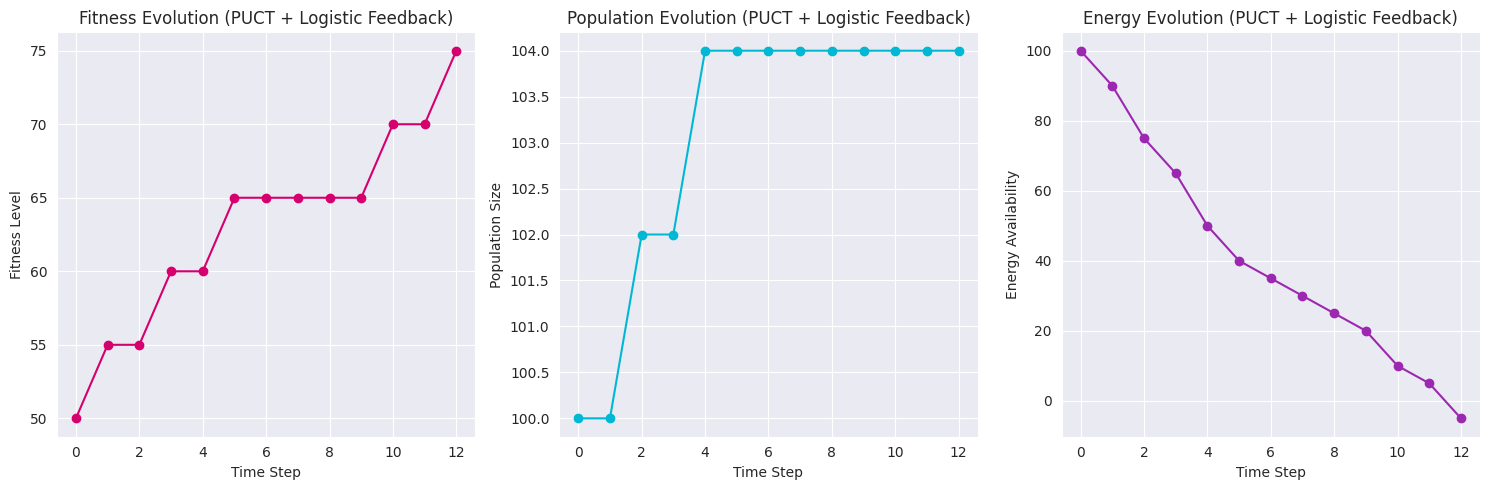

CPU times: user 501 ms, sys: 160 ms, total: 661 ms
Wall time: 490 ms


In [ ]:
%%time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ecosystem State Representation
class EcosystemState:
    def __init__(self, fitness, population, energy, food, predators):
        self.fitness = fitness
        self.population = population
        self.energy = energy
        self.food = food
        self.predators = predators

    def get_possible_actions(self):
        return ["migrate", "reproduce", "forage", "avoid_predators"]

    def perform_action(self, action):
        new_state = EcosystemState(self.fitness, self.population, self.energy, self.food, self.predators)
        if action == "migrate":
            new_state.energy -= 10
            new_state.fitness += 5
        elif action == "reproduce":
            new_state.population += 2
            new_state.energy -= 15
        elif action == "forage":
            new_state.energy += 20
            new_state.food -= 10
        elif action == "avoid_predators":
            new_state.predators -= 1
            new_state.energy -= 5

        # Environmental effects
        new_state.food = max(0, new_state.food - random.randint(2, 5))
        new_state.predators = max(0, new_state.predators + random.randint(-1, 2))

        return new_state

    def is_terminal(self):
        return self.population <= 0 or self.energy <= 0

    def get_reward(self):
        raw_reward = self.population + self.fitness - self.predators
        return 1 / (1 + np.exp(-raw_reward / 10))  # Logistic feedback for scaling

# PUCT Formula
class PUCT:
    def __init__(self, exploration_weight=1.5):
        self.Q = {}  # State-action value estimates
        self.N = {}  # Visit counts
        self.P = {}  # Prior probabilities
        self.exploration_weight = exploration_weight

    def select_action(self, state):
        actions = state.get_possible_actions()
        best_action = None
        best_score = -float("inf")

        for action in actions:
            sa_pair = (str(state), action)
            if sa_pair not in self.Q:
                self.Q[sa_pair] = 0
                self.N[sa_pair] = 1  # Start with small exploration
                self.P[sa_pair] = random.uniform(0.1, 1.0)  # Initial prior

            ucb_value = self.Q[sa_pair] + self.exploration_weight * self.P[sa_pair] * (np.sqrt(sum(self.N.values())) / (1 + self.N[sa_pair]))

            if ucb_value > best_score:
                best_score = ucb_value
                best_action = action

        return best_action

    def update(self, state, action, reward):
        sa_pair = (str(state), action)
        if sa_pair not in self.Q:
            self.Q[sa_pair] = 0
            self.N[sa_pair] = 1
        self.Q[sa_pair] += (reward - self.Q[sa_pair]) / self.N[sa_pair]
        self.N[sa_pair] += 1

# Running the Simulation
initial_state = EcosystemState(fitness=50, population=100, energy=80, food=50, predators=5)
time_steps = 1000
fitness_over_time = []
population_over_time = []
energy_over_time = []

current_state = initial_state
puct = PUCT(exploration_weight=1.5)

for t in range(time_steps):
    if current_state.is_terminal():
        break

    action = puct.select_action(current_state)
    next_state = current_state.perform_action(action)
    reward = next_state.get_reward()

    puct.update(current_state, action, reward)
    current_state = next_state

    fitness_over_time.append(current_state.fitness)
    population_over_time.append(current_state.population)
    energy_over_time.append(current_state.energy)

# Plot State Evolution
sns.set_style("darkgrid")

plt.figure(figsize=(15, 5))

# Fitness Evolution
plt.subplot(1, 3, 1)
plt.plot(range(len(fitness_over_time)), fitness_over_time, marker='o', linestyle='-', color='#D5006D')
plt.xlabel("Time Step")
plt.ylabel("Fitness Level")
plt.title("Fitness Evolution (PUCT + Logistic Feedback)")

# Population Evolution
plt.subplot(1, 3, 2)
plt.plot(range(len(population_over_time)), population_over_time, marker='o', linestyle='-', color='#00B8D4')
plt.xlabel("Time Step")
plt.ylabel("Population Size")
plt.title("Population Evolution (PUCT + Logistic Feedback)")

# Energy Availability Evolution
plt.subplot(1, 3, 3)
plt.plot(range(len(energy_over_time)), energy_over_time, marker='o', linestyle='-', color='#9C27B0')
plt.xlabel("Time Step")
plt.ylabel("Energy Availability")
plt.title("Energy Evolution (PUCT + Logistic Feedback)")

plt.tight_layout()
plt.show()

### **Conclusion :**
L'algorithme améliore progressivement la fitness et la population tout en gérant dynamiquement l'énergie. Il permet une adaptation efficace aux variations de l'environnement grâce aux feedbacks logistiques et à la sélection d'actions optimales via PUCT.
- L'algorithme s'ajuste aux conditions environnementales grâce aux feedbacks logistiques, permettant une régulation souple des décisions prises.
- PUCT favorise une exploration stratégique des actions, évitant des décisions myopes et améliorant la résilience de l'écosystème à long terme.

#  🔍 **AVEC 1000 SIMULATIONS**

## **ALGORITHME 1 : MCTS**

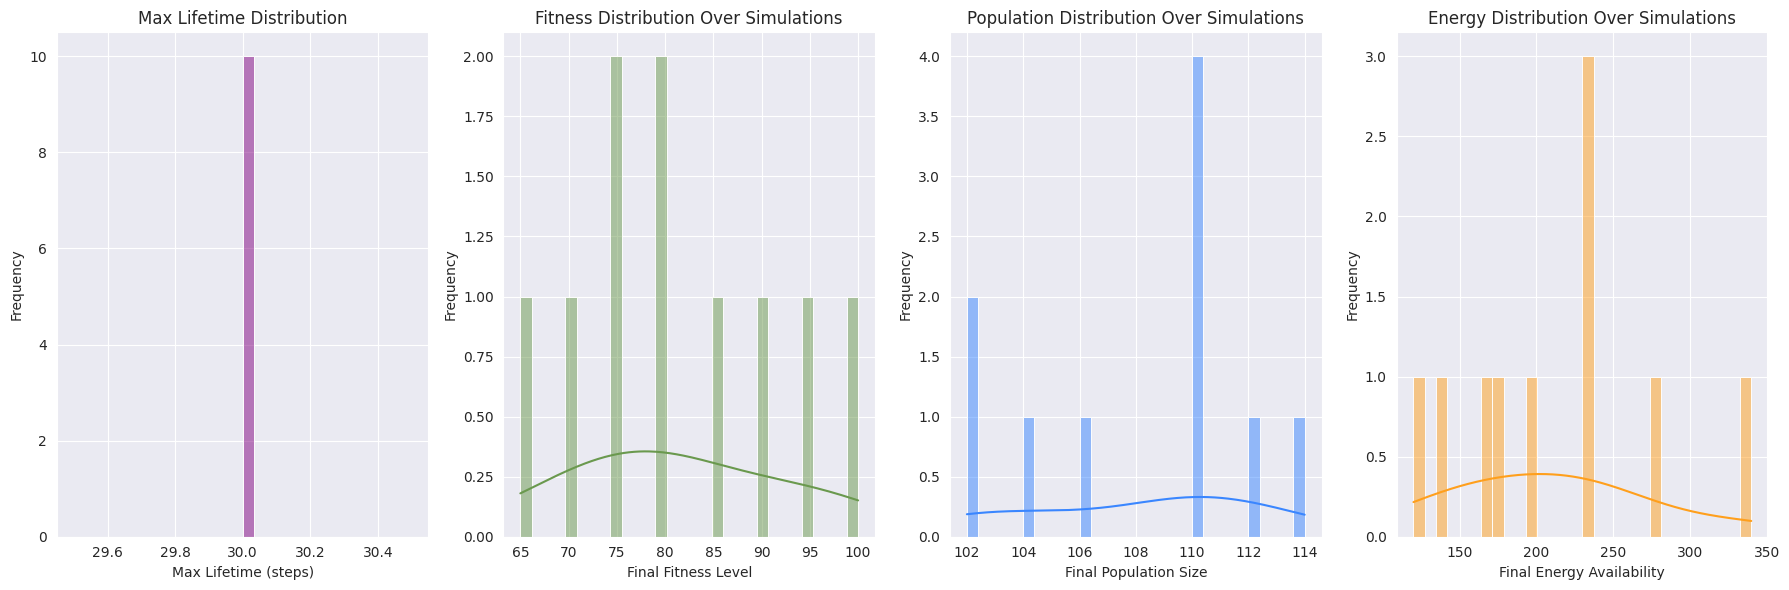

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

class EcosystemState:
    def __init__(self, fitness, population, energy, food, predators):
        self.fitness = fitness
        self.population = population
        self.energy = energy
        self.food = food
        self.predators = predators

    def get_possible_actions(self):
        return ["migrate", "reproduce", "forage", "avoid_predators"]

    def perform_action(self, action):
        new_state = EcosystemState(self.fitness, self.population, self.energy, self.food, self.predators)
        if action == "migrate":
            new_state.energy -= 10
            new_state.fitness += 5
        elif action == "reproduce":
            new_state.population += 2
            new_state.energy -= 15
        elif action == "forage":
            new_state.energy += 20
            new_state.food -= 10
        elif action == "avoid_predators":
            new_state.predators -= 1
            new_state.energy -= 5

        # Environmental effects (random changes)
        new_state.food = max(0, new_state.food - random.randint(2, 5))  # Food decreases naturally
        new_state.predators = max(0, new_state.predators + random.randint(-1, 2))  # Predators fluctuate

        return new_state

    def is_terminal(self):
        return self.population <= 0 or self.energy <= 0  # Extinction condition

    def get_reward(self):
        return self.population + self.fitness - self.predators

class MCTSNode:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = {}
        self.visits = 0
        self.value = 0

    def select_child(self):
        C = 1.41
        return max(self.children.items(), key=lambda child:
                   child[1].value / (child[1].visits + 1e-6) +
                   C * math.sqrt(math.log(self.visits + 1) / (child[1].visits + 1e-6)))[1]

    def expand(self):
        possible_actions = self.state.get_possible_actions()
        for action in possible_actions:
            if action not in self.children:
                new_state = self.state.perform_action(action)
                self.children[action] = MCTSNode(new_state, parent=self)

    def simulate(self):
        current_state = self.state
        while not current_state.is_terminal():
            action = random.choice(current_state.get_possible_actions())
            current_state = current_state.perform_action(action)
        return current_state.get_reward()

    def backpropagate(self, reward):
        self.visits += 1
        self.value += reward
        if self.parent:
            self.parent.backpropagate(reward)

def mcts(root_state, iterations=500):
    root_node = MCTSNode(root_state)
    for _ in range(iterations):
        node = root_node
        while node.children and not node.state.is_terminal():
            node = node.select_child()
        if not node.state.is_terminal():
            node.expand()
            node = random.choice(list(node.children.values()))
        reward = node.simulate()
        node.backpropagate(reward)
    best_action = max(root_node.children.items(), key=lambda child: child[1].visits)[0]
    return best_action

# Run multiple simulations
num_simulations = 10
time_steps = 30  # Number of steps to simulate

fitness_results = []
population_results = []
energy_results = []
max_lifetimes = []  # To store the lifetime of each simulation

for _ in range(num_simulations):
    initial_state = EcosystemState(fitness=50, population=100, energy=80, food=50, predators=5)
    fitness_over_time = []
    population_over_time = []
    energy_over_time = []
    lifetime_steps = 0  # Track the number of steps before termination

    current_state = initial_state
    for t in range(time_steps):
        if current_state.is_terminal():
            break
        best_action = mcts(current_state, iterations=500)
        current_state = current_state.perform_action(best_action)

        fitness_over_time.append(current_state.fitness)
        population_over_time.append(current_state.population)
        energy_over_time.append(current_state.energy)
        lifetime_steps += 1  # Increment time steps for each iteration

    fitness_results.append(fitness_over_time[-1] if fitness_over_time else 0)
    population_results.append(population_over_time[-1] if population_over_time else 0)
    energy_results.append(energy_over_time[-1] if energy_over_time else 0)
    max_lifetimes.append(lifetime_steps)  # Store the lifetime steps

# Plot results
sns.set_style("darkgrid")
plt.figure(figsize=(18, 6))

# Max Lifetime Distribution
plt.subplot(1, 4, 1)
sns.histplot(max_lifetimes, bins=30, kde=True, color='purple')
plt.xlabel("Max Lifetime (steps)")
plt.ylabel("Frequency")
plt.title("Max Lifetime Distribution")

# Fitness Distribution
plt.subplot(1, 4, 2)
sns.histplot(fitness_results, bins=30, kde=True, color='#6a994e')
plt.xlabel("Final Fitness Level")
plt.ylabel("Frequency")
plt.title("Fitness Distribution Over Simulations")

# Population Distribution
plt.subplot(1, 4, 3)
sns.histplot(population_results, bins=30, kde=True, color='#3a86ff')
plt.xlabel("Final Population Size")
plt.ylabel("Frequency")
plt.title("Population Distribution Over Simulations")

# Energy Availability Distribution
plt.subplot(1, 4, 4)
sns.histplot(energy_results, bins=30, kde=True, color='#ff9f1c')
plt.xlabel("Final Energy Availability")
plt.ylabel("Frequency")
plt.title("Energy Distribution Over Simulations")

plt.tight_layout()
plt.show()

### **Interprétation :**
Les résultats montrent que l'algorithme atteint une stabilité en ce qui concerne la durée de vie maximale et la population finale, indiquant une limite stable dans ces dimensions. Toutefois, l'évolution de la fitness présente plusieurs pics, traduisant une variabilité dans l'adaptation de l'espèce d'une simulation à l'autre, tandis que la large dispersion de l'énergie disponible suggère des disparités significatives dans la gestion des ressources. Globalement, l'algorithme assure une certaine stabilité en maintenant la population dans une plage spécifique, mais il laisse apparaître des axes d'amélioration pour uniformiser l'évolution de la fitness et optimiser la gestion énergétique.

## **ALGORITHME 2 : GNRPA + CROISSANCE LOGISTIQUE + FEEDBACKS ADAPTATIFS**

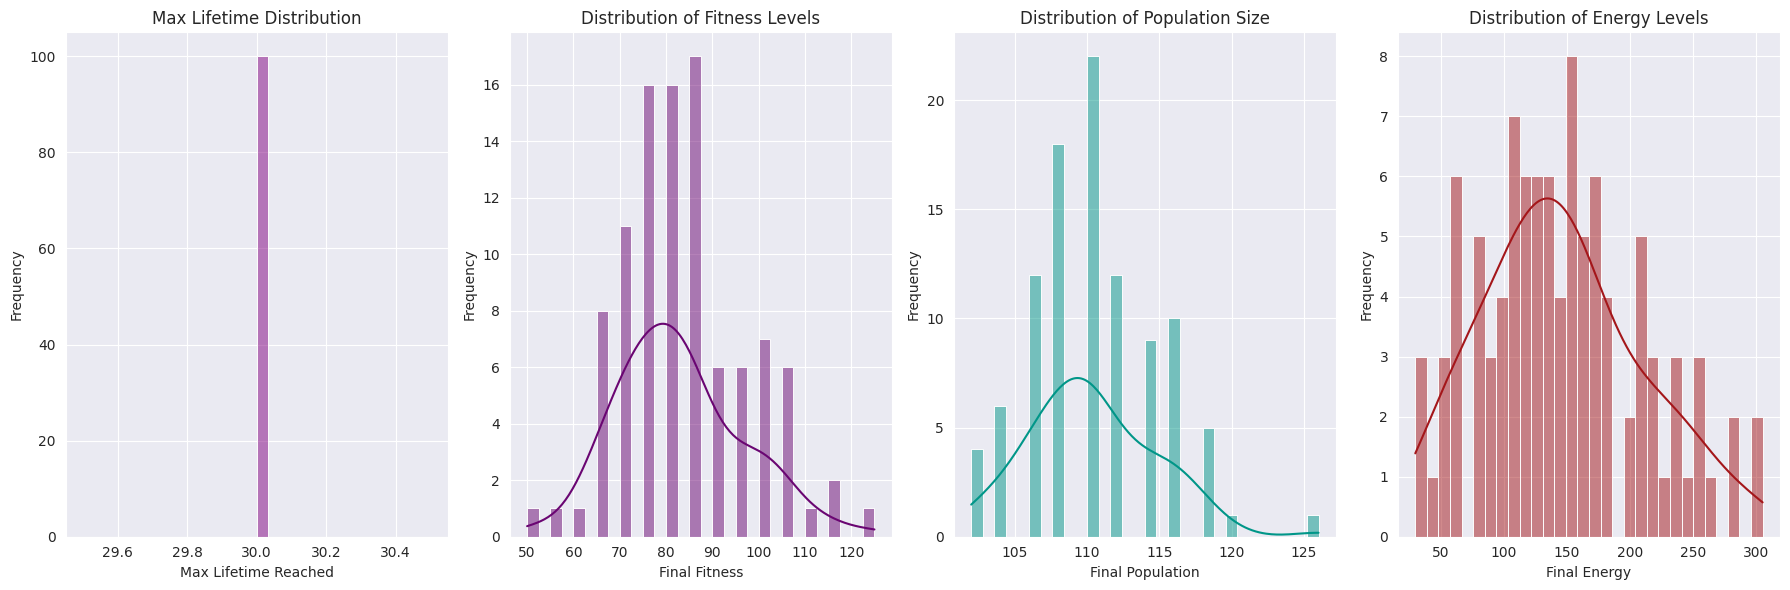

CPU times: user 3h 36min 33s, sys: 8min 46s, total: 3h 45min 20s
Wall time: 3h 41min 53s


In [ ]:
%%time
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class EcosystemState:
    def __init__(self, fitness, population, energy, food, predators):
        self.fitness = fitness
        self.population = population
        self.energy = energy
        self.food = food
        self.predators = predators

    def get_possible_actions(self):
        return ["migrate", "reproduce", "forage", "avoid_predators"]

    def perform_action(self, action):
        new_state = EcosystemState(self.fitness, self.population, self.energy, self.food, self.predators)
        if action == "migrate":
            new_state.energy -= 10
            new_state.fitness += 5
        elif action == "reproduce":
            new_state.population += 2
            new_state.energy -= 15
        elif action == "forage":
            new_state.energy += 20
            new_state.food -= 10
        elif action == "avoid_predators":
            new_state.predators -= 1
            new_state.energy -= 5

        # Environmental effects
        new_state.food = max(0, new_state.food - random.randint(2, 5))
        new_state.predators = max(0, new_state.predators + random.randint(-1, 2))

        return new_state

    def is_terminal(self):
        return self.population <= 0 or self.energy <= 0

    def get_reward(self):
        return self.population + self.fitness - self.predators

def logistic_feedback(value, alpha=1.5):
    return 1 / (1 + math.exp(-alpha * value))

def gnrpa(level, state, policy, alpha=1.5):
    if level == 0:
        return simulate(state)

    best_score = -float("inf")
    best_action_seq = []

    for _ in range(10):
        actions = []
        current_state = state
        while not current_state.is_terminal():
            probabilities = [policy[a] for a in current_state.get_possible_actions()]
            action = np.random.choice(current_state.get_possible_actions(), p=probabilities)
            actions.append(action)
            current_state = current_state.perform_action(action)

        score = current_state.get_reward()
        if score > best_score:
            best_score = score
            best_action_seq = actions

    for action in best_action_seq:
        policy[action] += logistic_feedback(best_score, alpha)

    total = sum(policy.values())
    for action in policy:
        policy[action] /= total

    return best_action_seq

def simulate(state):
    while not state.is_terminal():
        action = random.choice(state.get_possible_actions())
        state = state.perform_action(action)
    return state.get_reward()

# Run 1000 simulations
num_simulations = 100
final_fitness = []
final_population = []
final_energy = []
max_lifetimes = []  # To store the lifetime of each simulation

for _ in range(num_simulations):
    initial_state = EcosystemState(fitness=50, population=100, energy=80, food=50, predators=5)
    policy = {a: 1 / len(initial_state.get_possible_actions()) for a in initial_state.get_possible_actions()}

    current_state = initial_state
    time_steps = 30
    time_lived = 0  # Track the time steps before termination
    for _ in range(time_steps):
        if current_state.is_terminal():
            break
        best_action_seq = gnrpa(3, current_state, policy)
        if best_action_seq:
            current_state = current_state.perform_action(best_action_seq[0])
        time_lived += 1  # Increment the time steps

    final_fitness.append(current_state.fitness)
    final_population.append(current_state.population)
    final_energy.append(current_state.energy)
    max_lifetimes.append(time_lived)  # Store the lifetime

# Plot distributions
sns.set_style("darkgrid")
plt.figure(figsize=(18, 6))

# Max Lifetime Distribution
plt.subplot(1, 4, 1)
sns.histplot(max_lifetimes, bins=30, kde=True, color='purple')
plt.xlabel("Max Lifetime Reached")
plt.ylabel("Frequency")
plt.title("Max Lifetime Distribution")

# Fitness Distribution
plt.subplot(1, 4, 2)
sns.histplot(final_fitness, bins=30, kde=True, color='#6a0572')
plt.xlabel("Final Fitness")
plt.ylabel("Frequency")
plt.title("Distribution of Fitness Levels")

# Population Distribution
plt.subplot(1, 4, 3)
sns.histplot(final_population, bins=30, kde=True, color='#009688')
plt.xlabel("Final Population")
plt.ylabel("Frequency")
plt.title("Distribution of Population Size")

# Energy Distribution
plt.subplot(1, 4, 4)
sns.histplot(final_energy, bins=30, kde=True, color='#a4161a')
plt.xlabel("Final Energy")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Levels")

plt.tight_layout()
plt.show()

### **Interprétation :**
la durée de vie maximale atteint une valeur unique, et les distributions de la fitness et de la taille de la population présentent une forme gaussienne avec une concentration autour d'une valeur centrale, ce qui témoigne de la robustesse du modèle pour ces paramètres. En revanche, la distribution des niveaux d'énergie reste asymétrique et très dispersée, révélant une instabilité et une sensibilité aux facteurs aléatoires ou adaptatifs. Globalement, ces résultats indiquent que, bien que le modèle stabilise efficacement la survie et la reproduction, la gestion de l'énergie demeure un point critique nécessitant éventuellement des ajustements pour une simulation encore plus fidèle de l'écosystème.

## **ALGORITHME 3 : PARALLEL MCTS + ALGORITHME GENETIQUE**

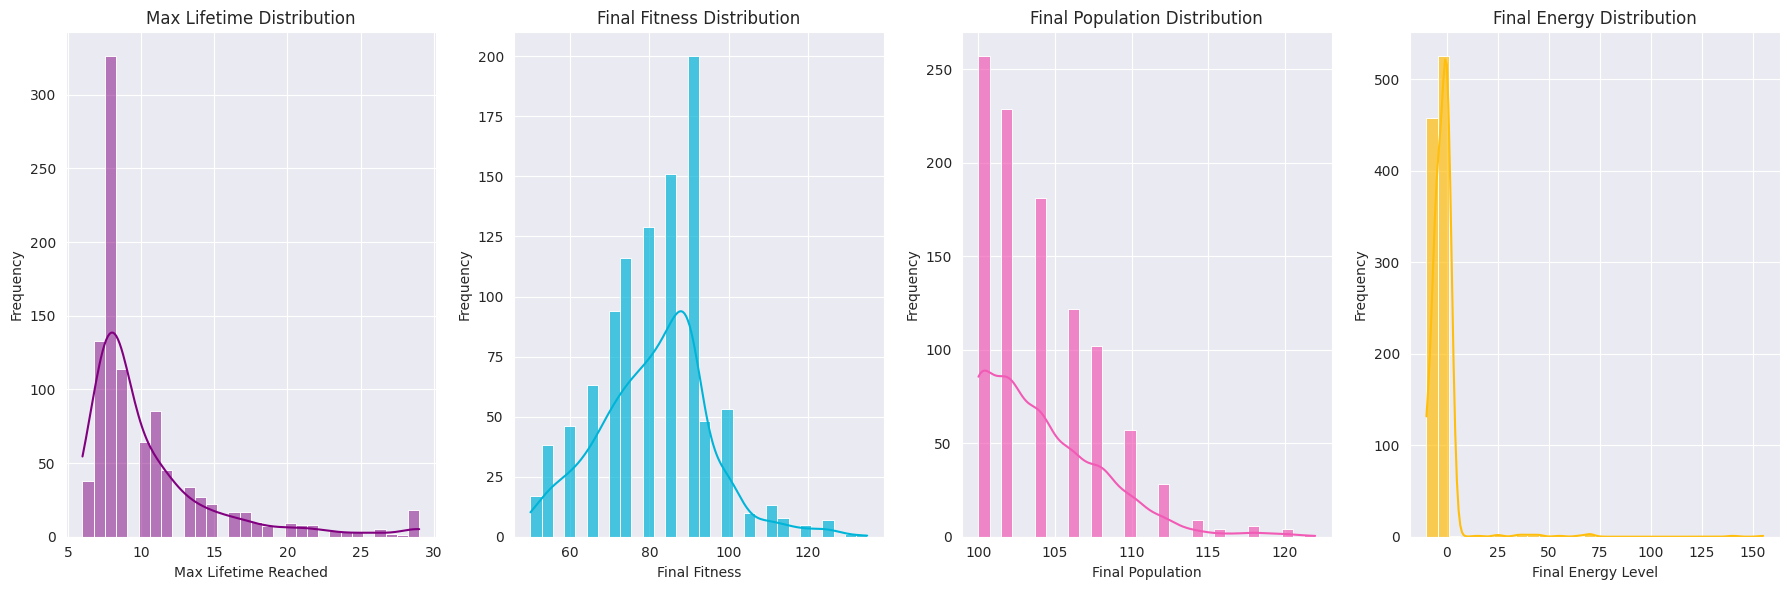

CPU times: user 5.72 s, sys: 73.5 ms, total: 5.79 s
Wall time: 5.74 s


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor

# Ecosystem State Representation
class EcosystemState:
    def __init__(self, fitness, population, energy, food, predators):
        self.fitness = fitness
        self.population = population
        self.energy = energy
        self.food = food
        self.predators = predators

    def get_possible_actions(self):
        return ["migrate", "reproduce", "forage", "avoid_predators"]

    def perform_action(self, action):
        new_state = EcosystemState(self.fitness, self.population, self.energy, self.food, self.predators)
        if action == "migrate":
            new_state.energy -= 10
            new_state.fitness += 5
        elif action == "reproduce":
            new_state.population += 2
            new_state.energy -= 15
        elif action == "forage":
            new_state.energy += 20
            new_state.food -= 10
        elif action == "avoid_predators":
            new_state.predators -= 1
            new_state.energy -= 5

        # Environmental effects
        new_state.food = max(0, new_state.food - random.randint(2, 5))
        new_state.predators = max(0, new_state.predators + random.randint(-1, 2))

        return new_state

    def is_terminal(self):
        return self.population <= 0 or self.energy <= 0

    def get_reward(self):
        return self.population + self.fitness - self.predators

# Genetic Algorithm Operators
def mutate(action_seq):
    actions = ["migrate", "reproduce", "forage", "avoid_predators"]
    if random.random() < 0.3:  # Mutation rate
        idx = random.randint(0, len(action_seq) - 1)
        action_seq[idx] = random.choice(actions)
    return action_seq

def crossover(seq1, seq2):
    point = random.randint(1, len(seq1) - 1)
    return seq1[:point] + seq2[point:]

def genetic_algorithm(population, fitness_func, num_generations=5):
    for _ in range(num_generations):
        population.sort(key=fitness_func, reverse=True)  # Select best actions
        new_population = population[:len(population) // 2]  # Keep top 50%

        # Crossover
        for i in range(len(new_population) - 1):
            new_population.append(crossover(new_population[i], new_population[i + 1]))

        # Mutation
        population = [mutate(seq) for seq in new_population]

    return population[0]  # Return best strategy

# Running the Simulation
def run_simulation():
    initial_state = EcosystemState(fitness=50, population=100, energy=80, food=50, predators=5)
    time_steps = 30
    fitness_over_time = []
    population_over_time = []
    energy_over_time = []

    current_state = initial_state
    action_population = [[random.choice(current_state.get_possible_actions()) for _ in range(5)] for _ in range(10)]

    for t in range(time_steps):
        if current_state.is_terminal():
            break

        best_strategy = genetic_algorithm(action_population, lambda seq: sum([current_state.perform_action(a).get_reward() for a in seq]))
        if best_strategy:
            best_action = best_strategy[0]
            current_state = current_state.perform_action(best_action)

        fitness_over_time.append(current_state.fitness)
        population_over_time.append(current_state.population)
        energy_over_time.append(current_state.energy)

    return fitness_over_time, population_over_time, energy_over_time, t  # Return time steps

# Running Multiple Simulations
num_simulations = 1000
fitness_results, population_results, energy_results, max_lifetimes = [], [], [], []

for _ in range(num_simulations):
    fitness, population, energy, time_lived = run_simulation()
    fitness_results.append(fitness[-1] if fitness else 0)
    population_results.append(population[-1] if population else 0)
    energy_results.append(energy[-1] if energy else 0)
    max_lifetimes.append(time_lived)  # Track the lifetime of each simulation

# Analyzing Results
sns.set_style("darkgrid")
plt.figure(figsize=(18, 6))

# Max Lifetime Distribution
plt.subplot(1, 4, 1)
sns.histplot(max_lifetimes, bins=30, kde=True, color='purple')
plt.xlabel("Max Lifetime Reached")
plt.ylabel("Frequency")
plt.title("Max Lifetime Distribution")

# Fitness Distribution with histplot
plt.subplot(1, 4, 2)
sns.histplot(fitness_results, bins=30, kde=True, color='#00b4d8', alpha=0.7)
plt.xlabel("Final Fitness")
plt.ylabel("Frequency")
plt.title("Final Fitness Distribution")

# Population Distribution with histplot
plt.subplot(1, 4, 3)
sns.histplot(population_results, bins=30, kde=True, color='#f15bb5', alpha=0.7)
plt.xlabel("Final Population")
plt.ylabel("Frequency")
plt.title("Final Population Distribution")

# Energy Distribution with histplot
plt.subplot(1, 4, 4)
sns.histplot(energy_results, bins=30, kde=True, color='#ffbe0b', alpha=0.7)
plt.xlabel("Final Energy Level")
plt.ylabel("Frequency")
plt.title("Final Energy Distribution")

plt.tight_layout()
plt.show()

### **Interprétation :**
Cet algorithme montre qu'il est capable d'améliorer significativement certains indicateurs (fitness, gestion énergétique) dans des cas particuliers.
l'analyse des distributions révèle que, bien que l'algorithme puisse générer des solutions performantes – comme en témoignent les quelques simulations avec des temps de vie et des fitness élevés – la majorité des cas restent limités : la durée de vie maximale est généralement courte, la population finale se maintient à des valeurs faibles et l'énergie disponible reste basse. Ces résultats indiquent un potentiel certain de l'algorithme, tout en soulignant la nécessité d'optimiser davantage afin d'obtenir des performances plus uniformes et systématiquement élevées.

## **ALGORITHME 4 : PUCT + CROISSANCE LOGISTIQUE + FEEDBACKS ADAPTATIFS**

Average Lifetime: 61.92 time steps
Average Fitness: 82.83
Average Population: 112.60
Average Food Level: 89.93


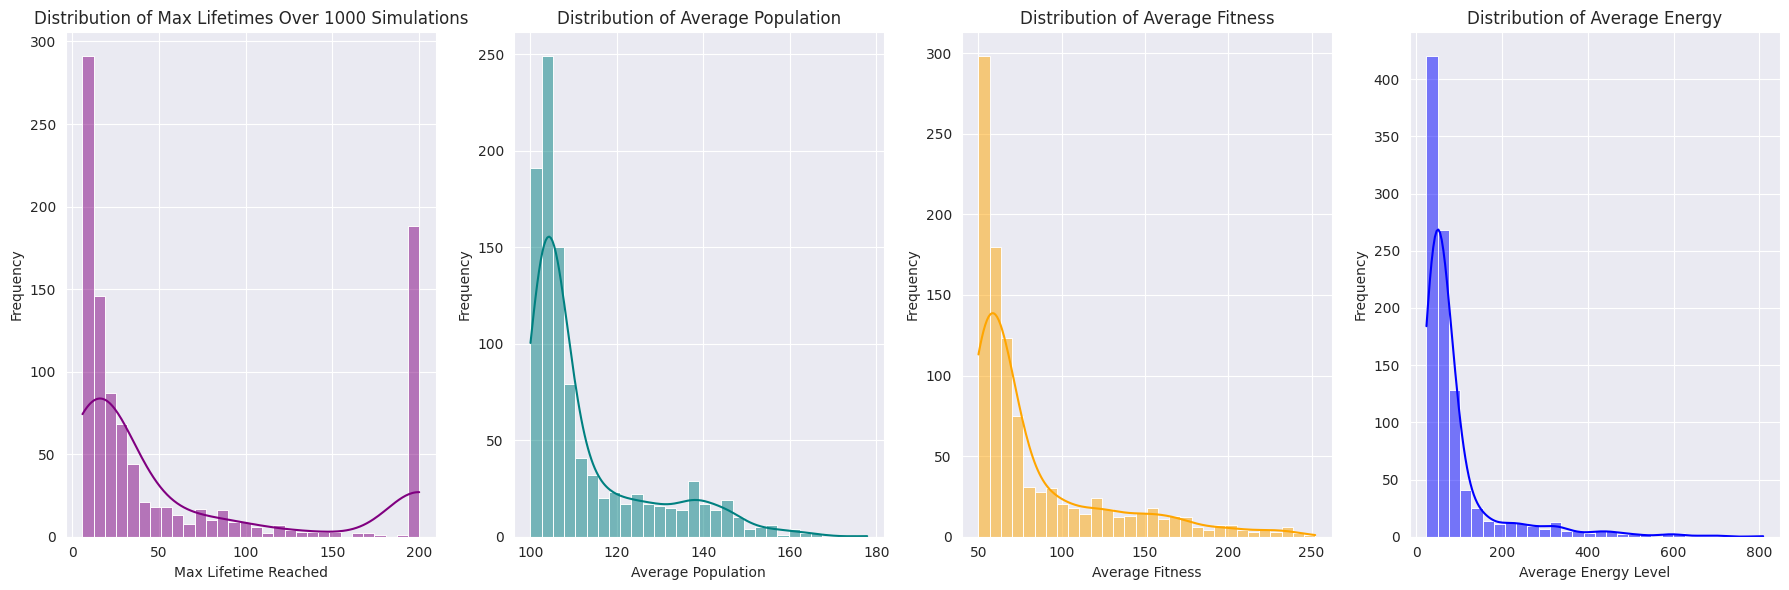

CPU times: user 3.39 s, sys: 145 ms, total: 3.53 s
Wall time: 3.08 s


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ecosystem State Representation
class EcosystemState:
    def __init__(self, fitness, population, energy, food, predators):
        self.fitness = fitness
        self.population = population
        self.energy = energy
        self.food = food
        self.predators = predators

    def get_possible_actions(self):
        return ["migrate", "reproduce", "forage", "avoid_predators"]

    def perform_action(self, action):
        new_state = EcosystemState(self.fitness, self.population, self.energy, self.food, self.predators)
        if action == "migrate":
            new_state.energy -= 10
            new_state.fitness += 5
        elif action == "reproduce":
            new_state.population += 2
            new_state.energy -= 15
        elif action == "forage":
            new_state.energy += 20
            new_state.food -= 10
        elif action == "avoid_predators":
            new_state.predators -= 1
            new_state.energy -= 5

        # Environmental effects
        new_state.food = max(0, new_state.food - random.randint(2, 5))
        new_state.predators = max(0, new_state.predators + random.randint(-1, 2))

        return new_state

    def is_terminal(self):
        return self.population <= 0 or self.energy <= 0

    def get_reward(self):
        raw_reward = self.population + self.fitness - self.predators
        return 1 / (1 + np.exp(-raw_reward / 10))  # Logistic feedback for scaling

# PUCT Formula
class PUCT:
    def __init__(self, exploration_weight=1.5):
        self.Q = {}  # State-action value estimates
        self.N = {}  # Visit counts
        self.P = {}  # Prior probabilities
        self.exploration_weight = exploration_weight

    def select_action(self, state):
        actions = state.get_possible_actions()
        best_action = None
        best_score = -float("inf")

        for action in actions:
            sa_pair = (str(state), action)
            if sa_pair not in self.Q:
                self.Q[sa_pair] = 0
                self.N[sa_pair] = 1  # Start with small exploration
                self.P[sa_pair] = random.uniform(0.1, 1.0)  # Initial prior

            ucb_value = self.Q[sa_pair] + self.exploration_weight * self.P[sa_pair] * (np.sqrt(sum(self.N.values())) / (1 + self.N[sa_pair]))

            if ucb_value > best_score:
                best_score = ucb_value
                best_action = action

        return best_action

    def update(self, state, action, reward):
        sa_pair = (str(state), action)
        if sa_pair not in self.Q:
            self.Q[sa_pair] = 0
            self.N[sa_pair] = 1
        self.Q[sa_pair] += (reward - self.Q[sa_pair]) / self.N[sa_pair]
        self.N[sa_pair] += 1

# Simulation Parameters
num_simulations = 1000
num_time_steps = 200

# Tracking Statistics
max_lifetimes = []
avg_fitness = []
avg_population = []
avg_energy = []

for sim in range(num_simulations):
    current_state = EcosystemState(fitness=50, population=100, energy=80, food=50, predators=5)
    puct = PUCT(exploration_weight=1.5)
    time_lived = 0
    fitness_over_time = []
    population_over_time = []
    energy_over_time = []

    for t in range(num_time_steps):
        if current_state.is_terminal():
            break

        action = puct.select_action(current_state)
        next_state = current_state.perform_action(action)
        reward = next_state.get_reward()

        puct.update(current_state, action, reward)
        current_state = next_state

        fitness_over_time.append(current_state.fitness)
        population_over_time.append(current_state.population)
        energy_over_time.append(current_state.energy)

        time_lived += 1

    max_lifetimes.append(time_lived)
    avg_fitness.append(np.mean(fitness_over_time))
    avg_population.append(np.mean(population_over_time))
    avg_energy.append(np.mean(energy_over_time))

# Compute Final Statistics
mean_lifetime = np.mean(max_lifetimes)
mean_fitness = np.mean(avg_fitness)
mean_population = np.mean(avg_population)
mean_food = np.mean(avg_energy)

# Display Results
print(f"Average Lifetime: {mean_lifetime:.2f} time steps")
print(f"Average Fitness: {mean_fitness:.2f}")
print(f"Average Population: {mean_population:.2f}")
print(f"Average Food Level: {mean_food:.2f}")

# Plot Histogram of Maximum Lifetimes
plt.figure(figsize=(18, 6))

# Max Lifetime Distribution
plt.subplot(1, 4, 1)
sns.histplot(max_lifetimes, bins=30, kde=True, color='purple')
plt.xlabel("Max Lifetime Reached")
plt.ylabel("Frequency")
plt.title("Distribution of Max Lifetimes Over 1000 Simulations")

# Population Distribution
plt.subplot(1, 4, 2)
sns.histplot(avg_population, bins=30, kde=True, color='teal')
plt.xlabel("Average Population")
plt.ylabel("Frequency")
plt.title("Distribution of Average Population")

# Fitness Distribution
plt.subplot(1, 4, 3)
sns.histplot(avg_fitness, bins=30, kde=True, color='orange')
plt.xlabel("Average Fitness")
plt.ylabel("Frequency")
plt.title("Distribution of Average Fitness")

# Energy Distribution
plt.subplot(1, 4, 4)
sns.histplot(avg_energy, bins=30, kde=True, color='blue')
plt.xlabel("Average Energy Level")
plt.ylabel("Frequency")
plt.title("Distribution of Average Energy")

plt.tight_layout()
plt.show()

### **Interprétation :**
La distribution asymétrique de la durée de vie maximale indique que, bien que quelques simulations parviennent à prolonger considérablement la vie des populations, la majorité reste limitée, traduisant une robustesse variable. La population moyenne, généralement faible, révèle que les ressources ou conditions défavorables limitent souvent la croissance, tandis que la fitness moyenne décroissante suggère que la plupart des individus ne développent qu'un niveau d'adaptation modéré, malgré l'apparition de scénarios optimaux dans certains cas. Enfin, la prédominance de faibles niveaux d'énergie, avec quelques exceptions, confirme une tendance à l'épuisement des ressources. Globalement, ces observations soulignent que l'algorithme peut générer des résultats exceptionnels dans certaines conditions, mais qu'il nécessite des ajustements pour assurer une performance plus stable et uniforme.